In [1]:
import pandas as pd
import re
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

(1409, 13)


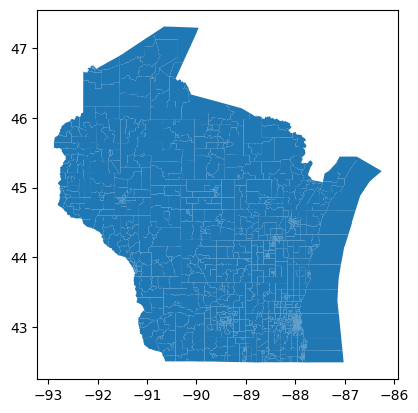

In [2]:
# use joined data
# df_joined = pd.read_csv ('Joined_data.csv')
df_joined = pd.read_csv ('../joined_data/joined_data_CHR.csv')

df_joined


geo = gpd.read_file("zip://../ct_data/tl_2019_55_tract.zip")
geo.plot()
print(geo.shape)
geo.head(1)

geo['GEOID']=geo['GEOID'].astype(np.int64)
df_joined = gpd.GeoDataFrame(pd.merge(df_joined,geo,how="left",left_on="ct",right_on = "GEOID"))


In [3]:
import pandas as pd
import re
import geopandas as gpd
import numpy as np
import libpysal.weights as weights
import libpysal

In [4]:
kd = libpysal.cg.KDTree(np.array(df_joined[["INTPTLAT","INTPTLON"]].values))
wnn = libpysal.weights.KNN(kd, 3)
nearest_pt = pd.DataFrame().from_dict(wnn.neighbors, orient="index")
for i in range(nearest_pt.shape[1]):
    nearest_pt = nearest_pt.rename({i:f"n_pt_{i}"}, axis=1)
nearest_pt.head(1)
print(nearest_pt)



      n_pt_0  n_pt_1  n_pt_2
0       1388       2    1387
1          4       2       3
2          0       1       3
3          5       2       1
4          1     403       5
...      ...     ...     ...
1385    1386    1384    1387
1386    1385    1387    1382
1387    1386    1382    1385
1388    1386    1385    1387
1389    1384    1385    1381

[1390 rows x 3 columns]


In [5]:
df_joined.reset_index(inplace=True)
df_joined

,index,ct,male,female,Total_x,.50,.50-.99,1.00-1.24,1.25-1.49,1.50-1.84,...,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,0,55001950100,1504,1431,2935,46,139,117,42,151,...,55001950100,9501,Census Tract 9501,G5020,S,233951801,17547549,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194..."
1,1,55001950201,676,667,1343,38,172,52,47,76,...,55001950201,9502.01,Census Tract 9502.01,G5020,S,110142594,7642055,+44.0031471,-089.8876764,"POLYGON ((-90.01877 44.04772, -90.01870 44.048..."
2,2,55001950202,1414,1167,2578,118,268,164,148,191,...,55001950202,9502.02,Census Tract 9502.02,G5020,S,467891428,50528185,+44.0888085,-089.7705744,"POLYGON ((-90.02638 44.08721, -90.02627 44.089..."
3,3,55001950400,2260,2269,4337,305,512,464,228,335,...,55001950400,9504,Census Tract 9504,G5020,S,235590227,1195071,+43.9407474,-089.7376994,"POLYGON ((-89.93773 43.96629, -89.93738 43.966..."
4,4,55001950501,841,670,1511,25,238,34,170,118,...,55001950501,9505.01,Census Tract 9505.01,G5020,S,114019282,19754029,+43.8817191,-089.8962390,"POLYGON ((-89.98419 43.91181, -89.98397 43.913..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,1385,55141011300,2090,2142,4133,103,225,141,306,332,...,55141011300,113,Census Tract 113,G5020,S,12013212,1425599,+44.3643651,-089.8372719,"POLYGON ((-89.85937 44.36194, -89.85928 44.362..."
1386,1386,55141011400,2205,2958,5145,181,285,555,399,193,...,55141011400,114,Census Tract 114,G5020,S,11657150,341824,+44.3673095,-089.8033856,"POLYGON ((-89.81719 44.38606, -89.81718 44.386..."
1387,1387,55141011500,2897,2936,5820,99,79,121,158,150,...,55141011500,115,Census Tract 115,G5020,S,33527893,605288,+44.3654643,-089.7591255,"POLYGON ((-89.80564 44.34373, -89.80245 44.347..."
1388,1388,55141011600,2570,2472,5014,257,316,167,255,141,...,55141011600,116,Census Tract 116,G5020,S,128689803,4188672,+44.2849618,-089.7980036,"POLYGON ((-89.91256 44.27344, -89.91253 44.273..."


In [6]:

df_joined = df_joined.join(nearest_pt)
df_joined.head(1)


,index,ct,male,female,Total_x,.50,.50-.99,1.00-1.24,1.25-1.49,1.50-1.84,...,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,n_pt_0,n_pt_1,n_pt_2
0,0,55001950100,1504,1431,2935,46,139,117,42,151,...,G5020,S,233951801,17547549,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194...",1388,2,1387


In [7]:
def is_df_sorted(df, colname):
    return pd.Index(df[colname]).is_monotonic
is_df_sorted(df_joined, "ct")

# df_joined["ct"]

True

In [8]:
use_pca = False
algo_input_addtri = []
col_names_joined = pd.Series(df_joined.columns)
print('All joined attributes \n',df_joined.columns.to_list(),'\n')

algo_input_addtri = ["household_median_income","Kindergarten","male","n_pt_0", "n_pt_1", "n_pt_2"]

# geo_attrib = ['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
#        'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry', 'ct', 'index']
# for each in col_names_joined:
#     if((each not in algo_input_addtri) and(each not in geo_attrib) ):
#         if use_pca and "n_pt" in each:
#             #skip for now 
#             continue
         
#         algo_input_addtri.append(each)
#         print(each)
    

# print(algo_input_addtri)

df_pca = df_joined[algo_input_addtri]





All joined attributes 
 ['index', 'ct', 'male', 'female', 'Total_x', '.50', '.50-.99', '1.00-1.24', '1.25-1.49', '1.50-1.84', '1.85-1.99', '2.00', 'Total_y', 'NoSchoolingCompleted', 'NurserySchool', 'Kindergarten', '1St_Grade', '2Nd_Grade', '3Rd_Grade', '4Th_Grade', '5Th_Grade', '6Th_Grade', '7Th_Grade', '8Th_Grade', '9Th_Grade', '10Th_Grade', '11Th_Grade', '12Th_Grade_NoDiploma', 'HighSchoolDiploma', 'AlternativeCredential', 'College1Year', 'College1MoreYears', 'Associate', 'Bachelor', 'Master', 'ProfessionalSchool', 'Doctorate', 'age_5', 'age_5_9', 'age_10_14', 'age_15_17', 'age_18_19', 'age_20', 'age_21', 'age_22_24', 'age_25_29', 'age_30_34', 'age_35_39', 'age_40_44', 'age_45_49', 'age_50_54', 'age_55_59', 'age_60_61', 'age_62_64', 'age_65_66', 'age_67_69', 'age_70_74', 'age_75_79', 'age_80_84', 'age_85', 'no_health_insurance_under18', 'no_health_insurance_18_34', 'no_health_insurance_35_64', 'no_health_insurance_65', 'white', 'black', 'native', 'asian', 'hawaiian', 'other', 'two',

In [9]:

#1. pca, may lose interpretability
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
if use_pca:
    pca = PCA(n_components=5)
    df_normalized_pca=(df_pca - df_pca.mean()) / df_pca.std()
    pca.fit(df_normalized_pca)
    # print(pca.components_ )

    pca_df = pd.DataFrame(pca.transform(df_pca), columns=['PCA%i' % i for i in range(5)], index=df_pca.index)
    pca_df = pca_df.join(nearest_pt)
    pca_df.head(1)
    cols_pca = pd.Series(pca_df.columns)
    algo_input_addtri = []
    for each in cols_pca:
        
        algo_input_addtri.append(each)
    print(algo_input_addtri)
    
    



In [10]:
if use_pca:
    df_final = pca_df
else:
#     df_final = df_joined[algo_input_addtri]
    
    addtri = ["household_median_income","Kindergarten","male"]
    neighbor = ["n_pt_0", "n_pt_1", "n_pt_2"]
    df_to_be_normalized = df_joined[addtri]
    print(df_to_be_normalized.head(1))
    df_normalized=(df_to_be_normalized - df_to_be_normalized.mean()) / df_to_be_normalized.std()
    df_final = df_normalized.join(nearest_pt)
    df_final.head(1)


   household_median_income  Kindergarten  male
0                  55562.0             0  1504


In [11]:
import libpysal.weights as weights
df_joined.head(1)

gdf = gpd.GeoDataFrame(df_joined, geometry=gpd.points_from_xy(df_joined['INTPTLAT'], df_joined['INTPTLON']))
gdf.head(1)



,index,ct,male,female,Total_x,.50,.50-.99,1.00-1.24,1.25-1.49,1.50-1.84,...,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,n_pt_0,n_pt_1,n_pt_2
0,0,55001950100,1504,1431,2935,46,139,117,42,151,...,G5020,S,233951801,17547549,+44.2022742,-089.7468898,POINT (44.20227 -89.74689),1388,2,1387


In [12]:
w_voronoi = weights.Voronoi.from_dataframe(gdf)

c:\users\cyz_0\appdata\local\programs\python\python38\lib\site-packages\libpysal\cg\alpha_shapes.py:578: UserWarning: Numba not imported, so alpha shape construction may be slower than expected.
  warn(NUMBA_WARN)


In [13]:
import copy
df_final.to_csv(r'synthetic_data_joined.txt', header=None, index=True, sep=',')
# print(df_final.head(1))
print(df_joined.shape)
final_input_attri = copy.copy(algo_input_addtri)
final_input_attri.insert(0,"id")
print(final_input_attri)

(1390, 109)
['id', 'household_median_income', 'Kindergarten', 'male', 'n_pt_0', 'n_pt_1', 'n_pt_2']


In [14]:

synthetic_data_input = pd.read_table(r'synthetic_data_joined.txt', sep=',', names=final_input_attri)
synthetic_data_input = synthetic_data_input.set_index("id")
# synthetic_data_input
synthetic_data_input.head(1)
np.where(pd.isnull(synthetic_data_input))
# synthetic_data_input.loc[74].tolist()
# w_voronoi = weights.Voronoi.from_dataframe(prev)

(array([], dtype=int64), array([], dtype=int64))

In [15]:
# prev[["DP03_0001E", "DP03_0001PE", 
#                 "DP03_0002E", 
#                 "DP03_0002PE", "DP03_0003E"]] = synthetic_data_input[["DP03_0001E", "DP03_0001PE", 
#                 "DP03_0002E", 
#                 "DP03_0002PE", "DP03_0003E"]]
# prev.head(1)

#find last 
colums_name = synthetic_data_input.columns
for i in range(len(synthetic_data_input.columns)):
    print(i+1," ",colums_name[i])
#     if("hispanic" == colums_name[i]):
#         print("last index", i+1)
#     if("n_pt_2" == colums_name[i]):
#         print("last neighbor index", i+1)
synthetic_data_input.shape
synthetic_data_input.head(1)

1   household_median_income
2   Kindergarten
3   male
4   n_pt_0
5   n_pt_1
6   n_pt_2


,household_median_income,Kindergarten,male,n_pt_0,n_pt_1,n_pt_2
id,,,,,,
0,-0.023514,-0.16128,-0.637277,1388,2,1387


In [16]:
# w_voronoi = weights.Voronoi.from_dataframe(prev)
input_list = []
beta = 10
lam = 0.0000001
maxit = 20
cluster = 3
file_name = str(beta)+"_"+str(lam)+"_"+str(maxit)+"_"+str(cluster)

In [17]:
# !beta = 20
# !lam = 0.000001
# !maxit = 100
# !cluster = 100

!rm -rf result_synthetic_data_joined.txt
!python3 STICC_main.py --fname=synthetic_data_joined.txt --oname=result_synthetic_data_joined.txt --attr_idx_start=1 \
--attr_idx_end=3 --spatial_idx_start=4 --spatial_idx_end=6 \
--spatial_radius=2 --number_of_clusters $cluster --lambda_parameter $lam --beta $beta --maxIters $maxit 

'rm' is not recognized as an internal or external command,
operable program or batch file.
Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [18]:
print(file_name)
# df_result = pd.read_csv('./result_synthetic_data_joined.txt',header=None)
# # joined.to_file("data/WIct.shp")http://localhost:8888/notebooks/Test_STICC-Filtered.ipynb#
# df_result
# df_result.to_csv(file_name,index=False,header=None)


10_1e-07_20_3


In [19]:
# df_append_result = df_joined[["ct","geometry"]]
# df_append_result.head(1)


In [20]:
# df_result = df_result.merge(df_append_result)
# df_result.head(1)

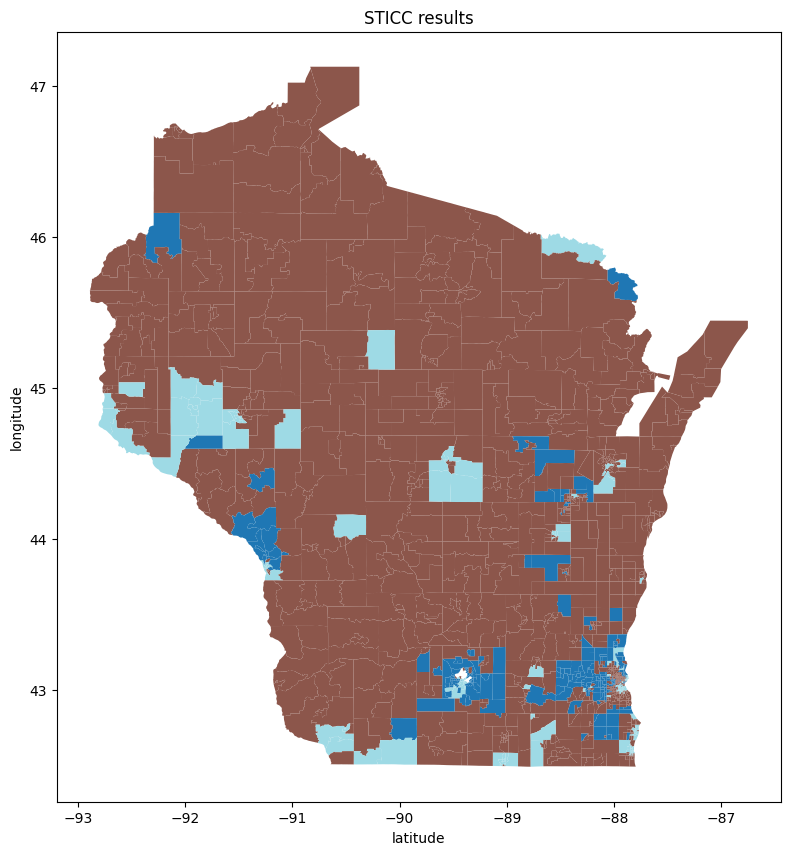

In [21]:
cm = np.loadtxt("result_synthetic_data_joined.txt")
geo = gpd.read_file("../joined_data/WIct.shp")
simple = geo[["ct","geometry"]].copy()
simple["cluster_membership"] = cm
simple.plot(column="cluster_membership",cmap="tab20",figsize=(10,10))
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("STICC results")

plt.savefig("saved.jpg",dpi=300)


In [22]:
# geo.plot(column="white",cmap="Blues",figsize=(10,10))
# geo.plot(column="asian",cmap="Blues",figsize=(10,10))
# geo.plot(column="black",cmap="Blues",figsize=(10,10))

# geo.plot(column="hawaiian",cmap="Blues",figsize=(10,10))


In [23]:
print(geo.columns.tolist())

['ct', 'male', 'female', 'Total_x', '.50', '.50-.99', '1.00-1.24', '1.25-1.49', '1.50-1.84', '1.85-1.99', '2.00', 'Total_y', 'NoSchoolin', 'NurserySch', 'Kindergart', '1St_Grade', '2Nd_Grade', '3Rd_Grade', '4Th_Grade', '5Th_Grade', '6Th_Grade', '7Th_Grade', '8Th_Grade', '9Th_Grade', '10Th_Grade', '11Th_Grade', '12Th_Grade', 'HighSchool', 'Alternativ', 'College1Ye', 'College1Mo', 'Associate', 'Bachelor', 'Master', 'Profession', 'Doctorate', 'age_5', 'age_5_9', 'age_10_14', 'age_15_17', 'age_18_19', 'age_20', 'age_21', 'age_22_24', 'age_25_29', 'age_30_34', 'age_35_39', 'age_40_44', 'age_45_49', 'age_50_54', 'age_55_59', 'age_60_61', 'age_62_64', 'age_65_66', 'age_67_69', 'age_70_74', 'age_75_79', 'age_80_84', 'age_85', 'no_health_', 'no_healt_1', 'no_healt_2', 'no_healt_3', 'pop_x', 'white', 'black', 'native', 'asian', 'hawaiian', 'other', 'two', 'family_inc', 'Total', '10000', '10000-1499', '15000-1999', '20000-2499', '25000-2999', '30000-3499', '35000-3999', '40000-4499', '45000_4999'

<AxesSubplot:>

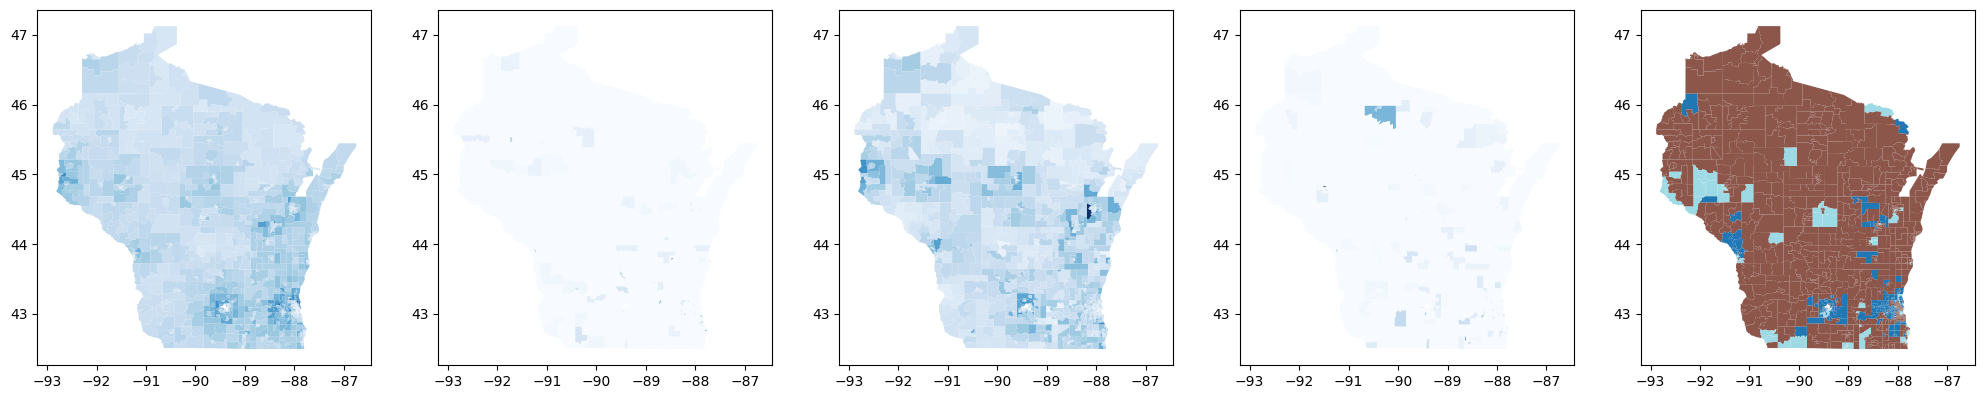

In [24]:
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
geo.plot(column="household_",cmap="Blues",figsize=(10,10), ax=ax[0])
geo.plot(column="Kindergart",cmap="Blues",figsize=(10,10), ax=ax[1])
geo.plot(column="male",cmap="Blues",figsize=(10,10), ax=ax[2])
geo.plot(column="hawaiian",cmap="Blues",figsize=(10,10), ax=ax[3])
simple.plot(column="cluster_membership",cmap="tab20", ax=ax[4])


In [25]:
group = pd.read_table('result_synthetic_data_joined.txt', names=["group"])

In [26]:
group.head(1)

,group
0,1


In [27]:
result_synthetic_data = gdf.join(group)


In [28]:
def cal_joint_statistic(nyc_data, w_voronoi):
    matched_connects = 0
    all_neighbors_connects = 0
    for obj_id, neighbors in w_voronoi.neighbors.items():
        obj_clus = nyc_data.iat[obj_id, -1]
        for nei in neighbors:
            nei_clus = nyc_data.iat[nei, -1]
            all_neighbors_connects += 1
            if obj_clus == nei_clus:
                matched_connects += 1
    return matched_connects / all_neighbors_connects

In [29]:
sp_contiguity = cal_joint_statistic(result_synthetic_data, w_voronoi)

In [30]:
print(sp_contiguity)

0.7574319260554584
